<a href="https://colab.research.google.com/github/Madihajavaid12345/Task-4-Analyze-and-visualize-sentiment-patterns-in-tweets/blob/main/Task_4_Analyze_and_visualize_sentiment_patterns_in_tweets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud


In [ ]:
# Step 1: Import the required libraries
import pandas as pd                    # For data handling
import matplotlib.pyplot as plt        # For visualizations
import seaborn as sns                  # For styled charts
from wordcloud import WordCloud


In [ ]:
# Step 2: Load the dataset
df = pd.read_csv("/content/twitter_training.csv")
df.columns = ["id", "entity", "sentiment", "content"]
# Show first few rows
df.head()


,id,entity,sentiment,content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
# Step 4: Basic data check
print("Shape of dataset:", df.shape)
print("Columns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())



Shape of dataset: (74681, 4)
Columns: Index(['id', 'entity', 'sentiment', 'content'], dtype='object')

Missing values:
 id             0
entity         0
sentiment      0
content      686
dtype: int64


In [ ]:
# Step 5: Clean the text column (remove rows with empty 'content')
df.dropna(subset=["content"], inplace=True)

# Optional: Reset index after dropping
df.reset_index(drop=True, inplace=True)


/tmp/ipython-input-19-2741924582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette="Set2")


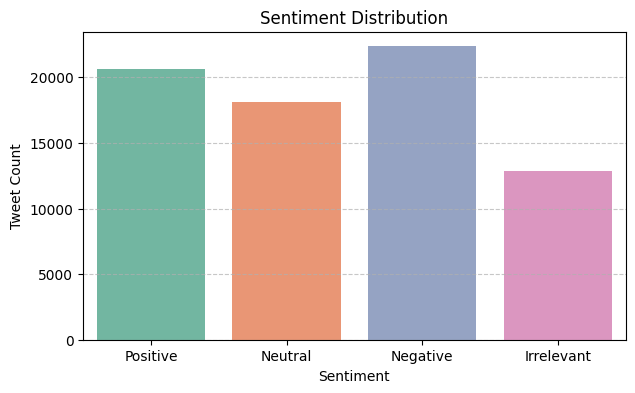

In [ ]:
# Step 6: Plot the count of sentiment labels
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="sentiment", palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


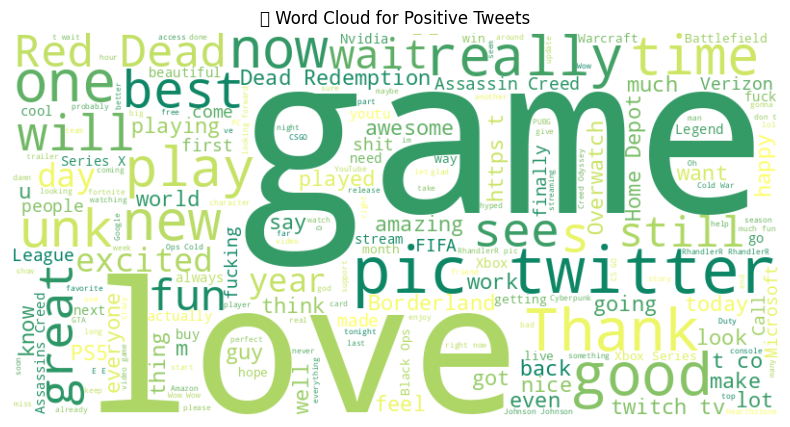

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all positive tweets into one big string
positive_tweets = " ".join(df[df["sentiment"] == "Positive"]["content"].dropna().astype(str))

# Generate the word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color="white", colormap="summer").generate(positive_tweets)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("🌞 Word Cloud for Positive Tweets")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


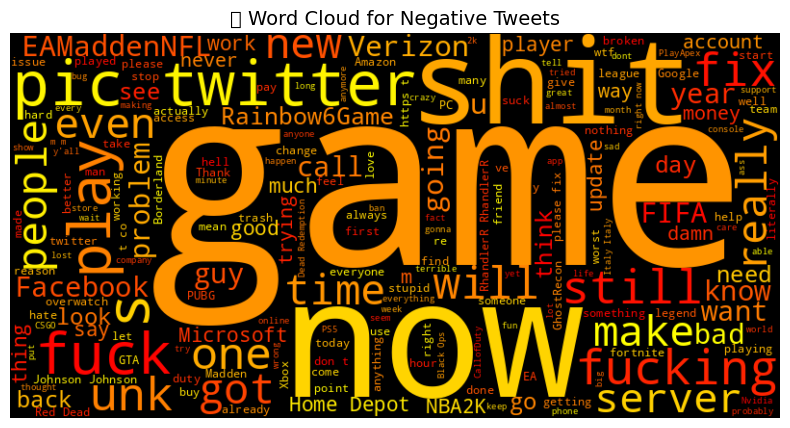

In [ ]:
# Join all negative tweets into one big string
negative_tweets = " ".join(df[df["sentiment"] == "Negative"]["content"].dropna().astype(str))

# Generate the word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color="black", colormap="autumn").generate(negative_tweets)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("🌧️ Word Cloud for Negative Tweets", fontsize=14)
plt.show()
